In [1]:
import numpy as np
import csv
import matplotlib.pyplot as mp
import pandas as pd

In [2]:
                                            # Parameters # 

alfa = 0.7
Title = "ETH" # "Shiba-Inu", "RAI", "FEI", "ETH", "BTC"                # Choose the desired Asset for test
sigma_event = 3                                                              # Desired sigma event quality 

# CF constraints
absolute_percentage = 0.05
Max_CF = 0.9

# Isolated Reserve 
IR_size = 1e6

# usable data
update_period = 5 # 7                                                        # CF update period
validation_period = 28
CF_test_period = 30
csv_data = np.zeros(CF_test_period)
x_ax = np.arange(CF_test_period)

# Test asset choice
# CSV_dict = {
    
#     "ETH" :           'eth-usd-max.csv',
#     "Shiba-Inu" :     'shib-usd.csv',
#     "RAI" :           'rai-usd-max.csv',
#     "FEI" :           'fei-usd-max.csv',
#     "BTC" :           'btc-usd-max.csv'
# }

filename_ETH = 'eth-usd-max.csv'
filename_SHIB = 'shib-usd.csv'

In [3]:
                                             # CSV prices file parsing #

a = np.genfromtxt(filename_ETH, delimiter=',')
lastN = a[-CF_test_period:]
lastN_prices_ETH = np.zeros(lastN.shape[0])
lastN_prices_SHIB = np.zeros(lastN.shape[0])

for _ in range(lastN.shape[0]):
    lastN_prices_ETH[_] = lastN[_][1]

b = np.genfromtxt(filename_SHIB, delimiter=',')
lastN = b[-CF_test_period:]

for _ in range(lastN.shape[0]):
    lastN_prices_SHIB[_] = lastN[_][1]

# mp.plot(x_ax, lastN_prices)
# mp.xlabel("days")                                                                               # plot prices for comparison
# mp.ylabel("price in USD")
# mp.title("{:.15s} Price". format(Title))
# mp.show()

In [4]:
Tokens_locked_ETH = 2700
Tokens_locked_SHIB = 0.6e12
Cf1 = np.zeros(30)
Cf2 = np.zeros(30)
Cf3 = np.zeros(30)
Cf4 = np.zeros(30)

def CF_discount_1(COA_coeff):
    return 1/(COA_coeff**(1/26))
def CF_discount_2(COA_coeff):
    return 1/(COA_coeff**(1/10))
def CF_discount_3(COA_coeff):
    return 1/(COA_coeff**3)
def CF_discount_4(COA_coeff):
    return ((1-COA_coeff**1.4))

#print(lastN_prices_ETH)
Test_IR_size1 = [0.5e6]*30
Test_IR_size2 = [1e6]*30
Test_IR_size3 = [10e6]*30
Test_IR_size4 = [50e6]*30


TVL = [15.34e6,14.8e6,13.96e6,13.22e6,12.37e6,11.83e6,12.49e6,12.0e6,12.37e6,12.34e6,12.37e6,11.71e6,12.02e6,12.43e6,
       12.6e6,12.43e6,12.34e6,11.38e6,11.57e6, 11.89e6,11.82e6,11.69e6,12.29e6,12.81e6,12.5e6,12.14e6,11.42e6,11.45e6,
       11.63e6,11.45e6]

for i in range (30):
    Cf1[i] = CF_discount_1(TVL[i]/Test_IR_size1[0])
    Cf2[i] = CF_discount_2(TVL[i]/Test_IR_size2[0])
    Cf3[i] = CF_discount_3(TVL[i]/Test_IR_size3[0])
    Cf4[i] = CF_discount_4(TVL[i]/Test_IR_size4[0])

#print(TVL[i]/Test_IR_size1[0])
#print(Cf1)
#mp.rcParams['figure.figsize'] = [10, 6]
#fig, ax = mp.subplots()

# plot all dicount coefficients 
#x_axes = COA_ar#np.arange(it)
#n1, = ax.plot(np.asarray(TVL)/np.asarray(Test_IR_size1),Cf1, label = "IR_size = 0.5e6")
#n2, = ax.plot(np.asarray(TVL)/np.asarray(Test_IR_size1),Cf2, label = "IR_size = 1e6")
#n3, = ax.plot(np.asarray(TVL)/np.asarray(Test_IR_size1),Cf3, label = "IR_size = 10e6")
#n4, = ax.plot(np.asarray(TVL)/np.asarray(Test_IR_size1),Cf4, label = "IR_size = 50e6")
# n5, = ax.plot(x_axes, third, label = "")
# n6, = ax.plot(x_axes, third, label = "")
# n7, = ax.plot(x_axes, third, label = "")

#print(it)



#print(np.asarray(TVL)/np.asarray(Test_IR_size1))

# mp.xlabel("TVL_to_IRsize_coefficient")
# mp.ylabel("CF_discount_value")
# mp.title("CF_discount")
# ax.legend(handles = [n1, n2, n3, n4])
# mp.show()

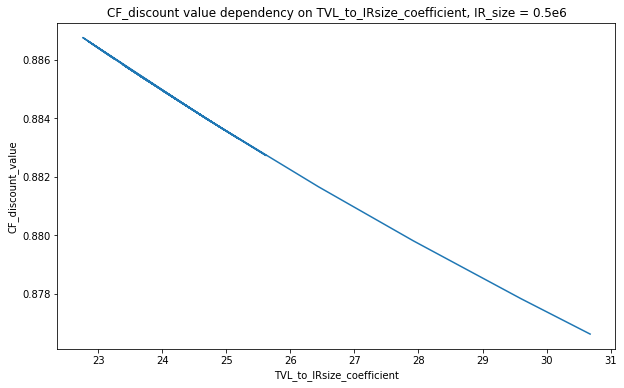

In [14]:
mp.rcParams['figure.figsize'] = [10, 6]
mp.plot(np.asarray(TVL)/np.asarray(Test_IR_size1),Cf1)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.title("CF_discount value dependency on TVL_to_IRsize_coefficient, IR_size = 0.5e6")
mp.show()

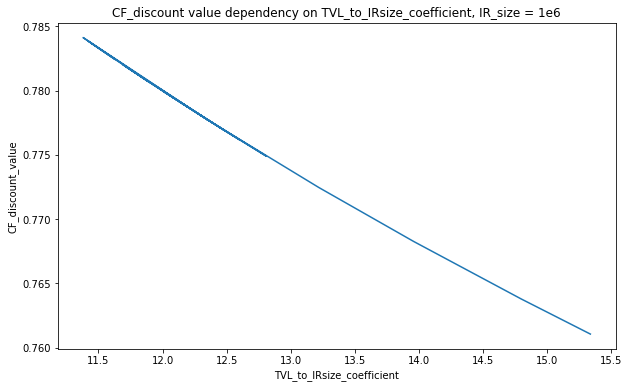

In [6]:
mp.rcParams['figure.figsize'] = [10, 6]
mp.plot(np.asarray(TVL)/np.asarray(Test_IR_size2),Cf2)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.title("CF_discount value dependency on TVL_to_IRsize_coefficient, IR_size = 1e6")
mp.show()

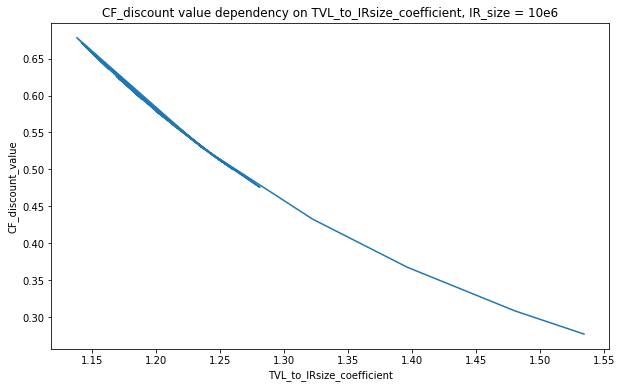

In [7]:
mp.rcParams['figure.figsize'] = [10, 6]
mp.plot(np.asarray(TVL)/np.asarray(Test_IR_size3),Cf3)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.title("CF_discount value dependency on TVL_to_IRsize_coefficient, IR_size = 10e6")
mp.show()

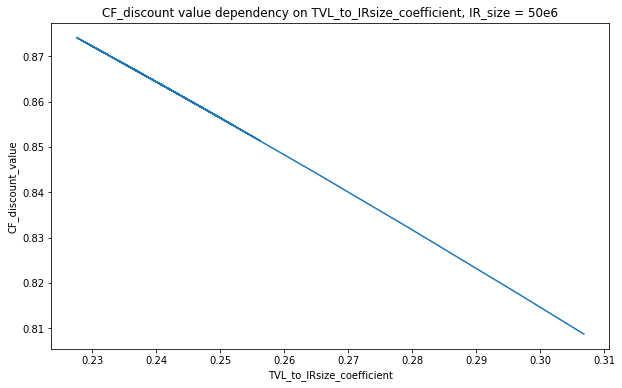

In [8]:
mp.rcParams['figure.figsize'] = [10, 6]
mp.plot(np.asarray(TVL)/np.asarray(Test_IR_size4),Cf4)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.title("CF_discount value dependency on TVL_to_IRsize_coefficient, IR_size = 50e6")
mp.show()

In [9]:

def token_amounts_calculation(TVL, price1, price2):
    amount_of_asset1 = (TVL/2)/price1
    amount_of_asset2 = (TVL/2)/price2
    return amount_of_asset1, amount_of_asset2

#print(token_amounts_calculation(11.63e6, 1600, 0.00001245))

[1.         1.23114441 1.0372992  0.8122524  0.61703386 0.46004586
 0.33818914 0.24570515 0.17668866 0.12589254 0.0889488  0.06236117
 0.04340718 0.03001145]


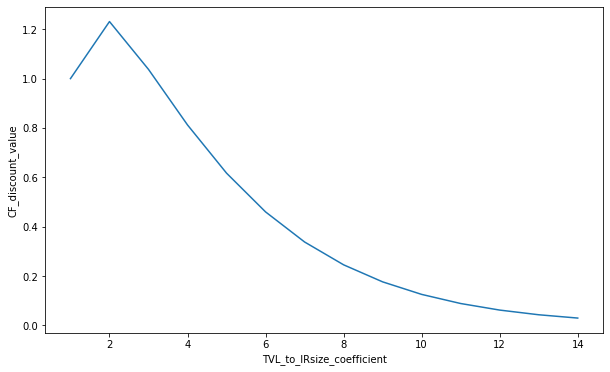

In [16]:
x = np.arange(1,15,1)
cf = np.zeros(x.shape[0])

for i in range(x.shape[0]):
    cf[i] = (x[i]**((1/x[i])-(x[i]/10)))
print(cf)
    
mp.plot(x, cf)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.show()

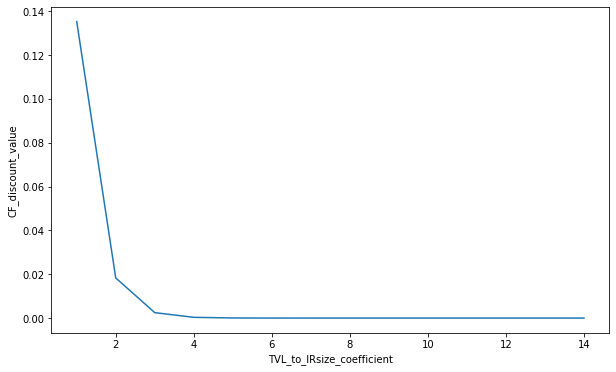

In [17]:
x = np.arange(1,15,1)
cf = np.zeros(x.shape[0])

for i in range(x.shape[0]):
    cf[i] = np.exp(-x[i])**2
    
mp.plot(x, cf)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.show()

[1.18895667 0.29276653 0.15528085 0.10233273 0.074969   0.05849505
 0.04759302 0.0398964  0.03420074 0.02983197 0.02638504 0.02360268
 0.02131412 0.01940176]


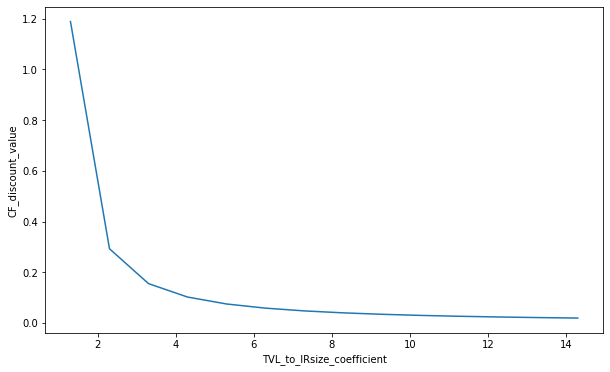

In [20]:
x = np.arange(1.3,15,1)
cf = np.zeros(x.shape[0])

for i in range(x.shape[0]):
    cf[i] = 0.8 - (x[i] + x[i]*np.log(x[i]))
    
print(-1/cf)
mp.plot(x, -1/cf)
mp.xlabel("TVL_to_IRsize_coefficient")
mp.ylabel("CF_discount_value")
mp.show()